In [2]:
import load
import oed
import figure

In [5]:
# jsonファイルの読み込み
result = load.load_result_json("../result/Result.json")

gene = result[0]["gene"]

N, M, theta, w_on, w_off, w, g, w_osc, w_nmj = oed.weight(gene)
alpha, x_peak, y_peak, dt, T, f, v, time, tau = oed.constant("setting")
N_, M_, f_inv, T_ = oed.time_constant_step(gene, "setting")

In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt

connectome_img = [
    cv2.imread(i)
    for i in sorted(glob.glob("../analysis/Result_aiz_negative_0/figure/connectome/*"))
]

for i in connectome_img:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.show()

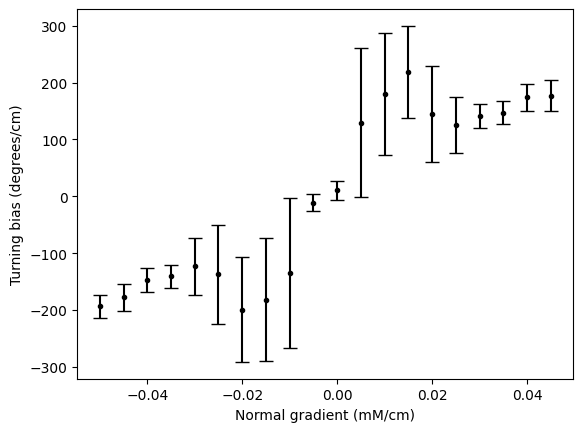

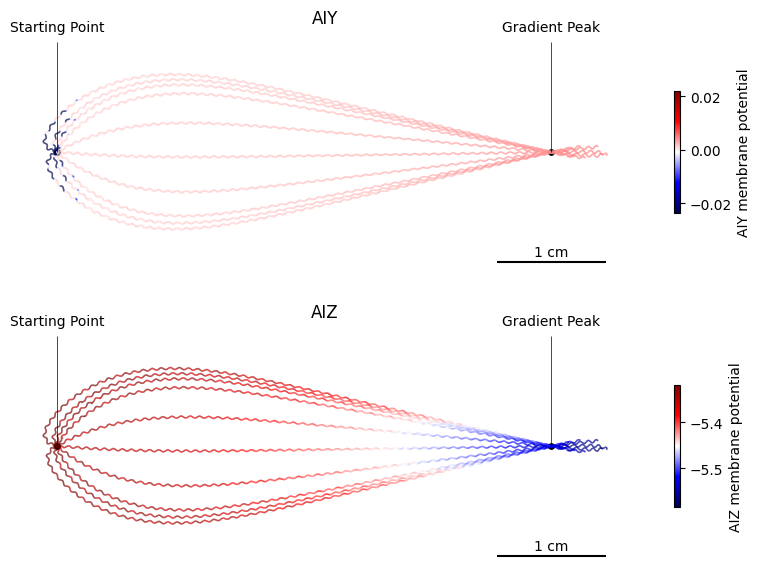

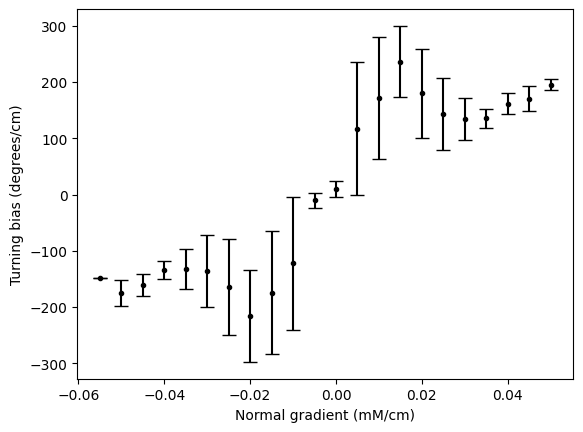

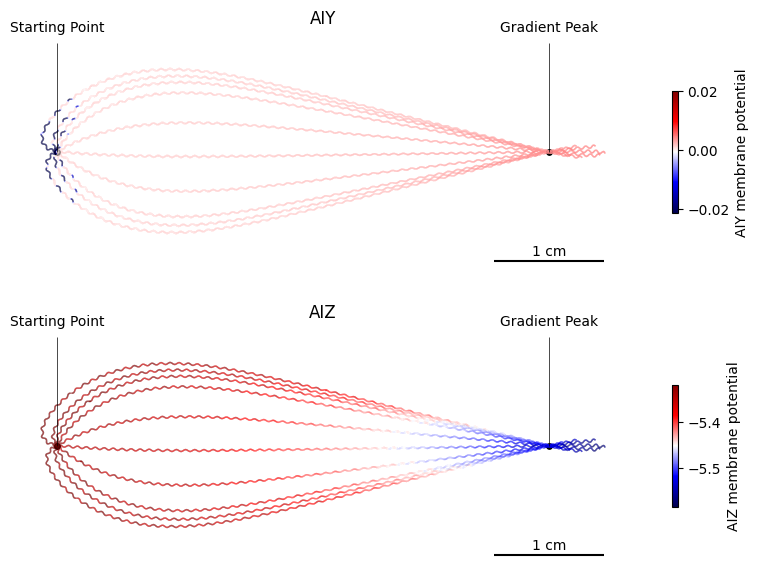

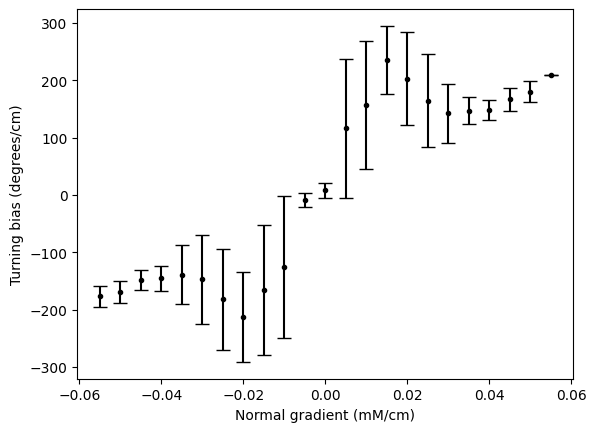

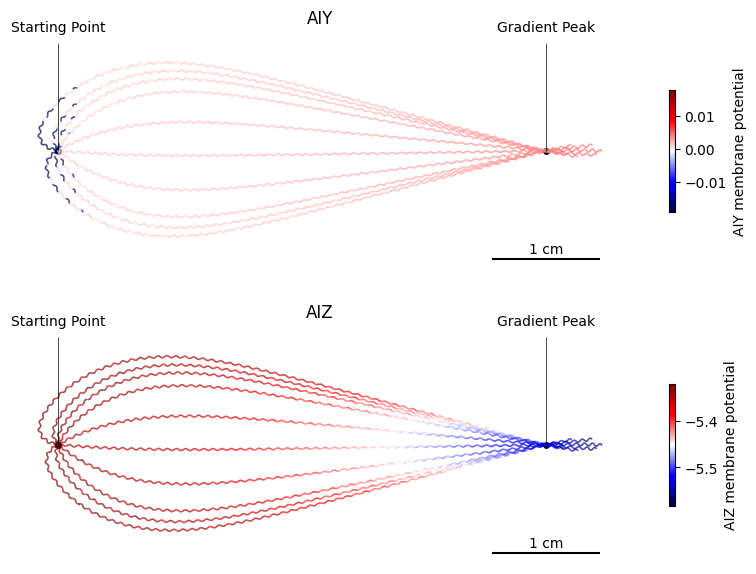

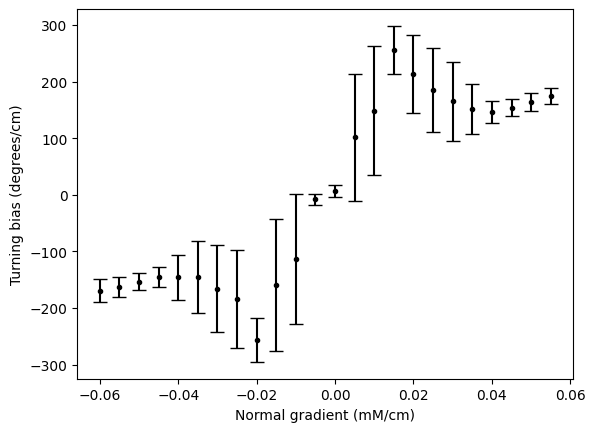

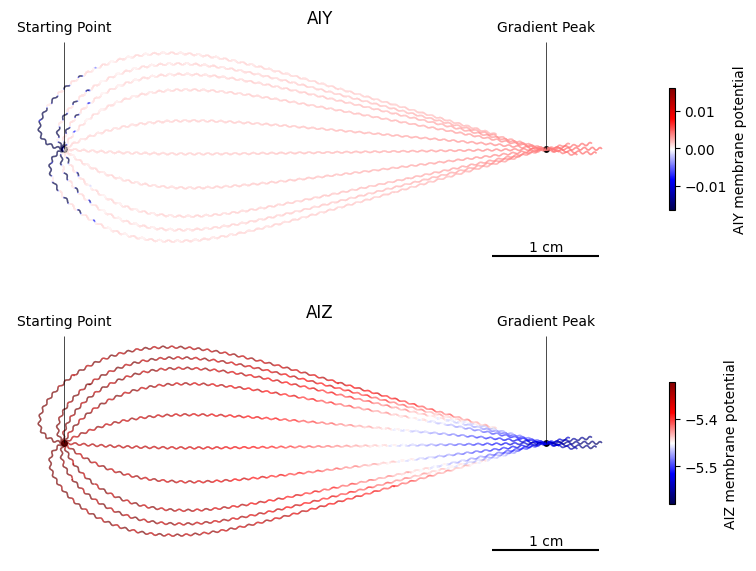

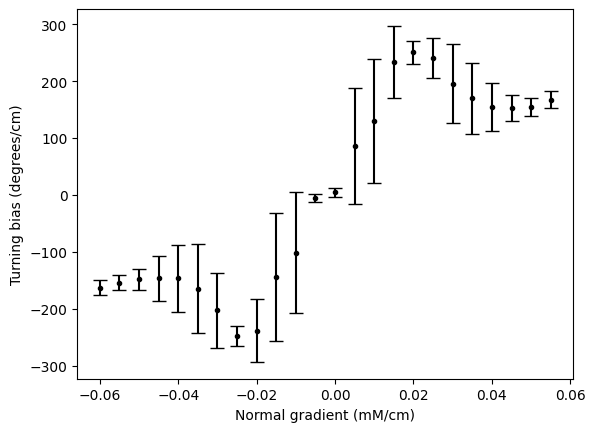

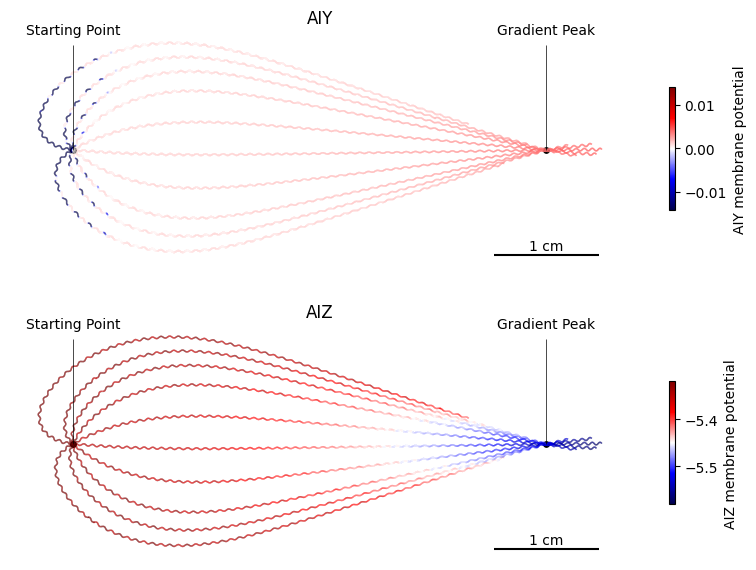

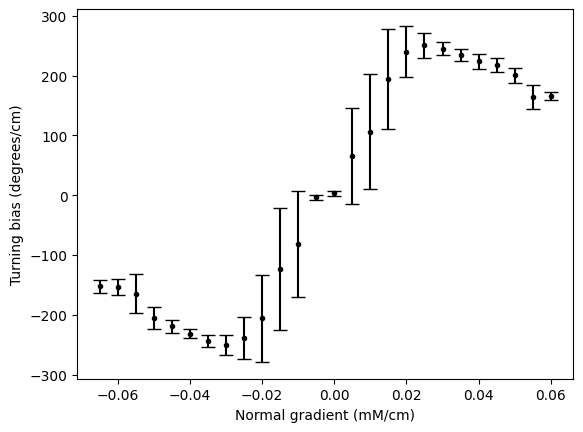

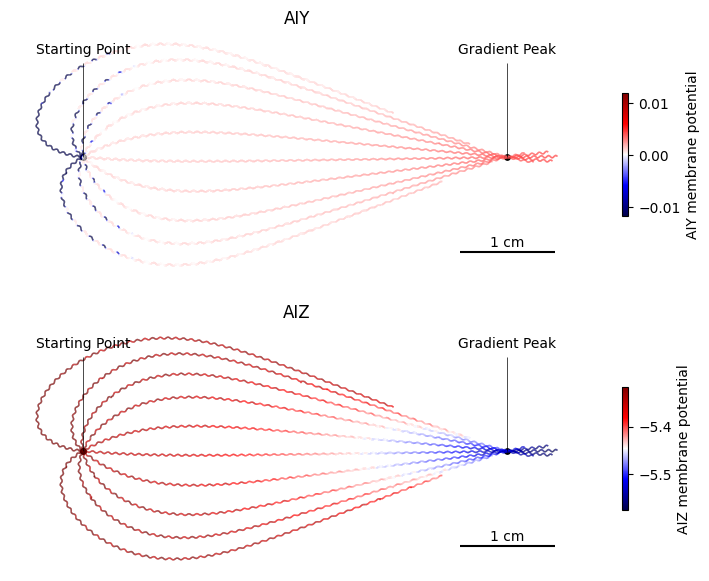

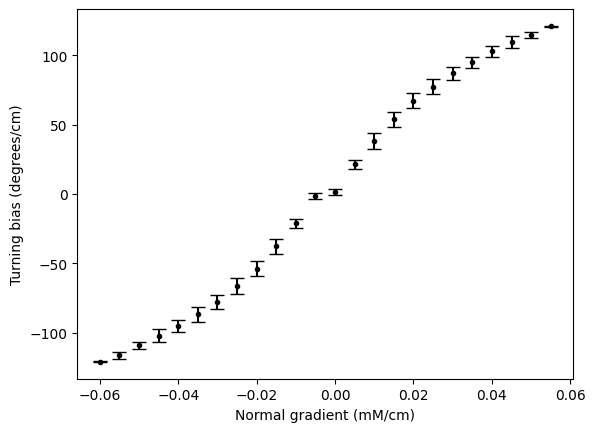

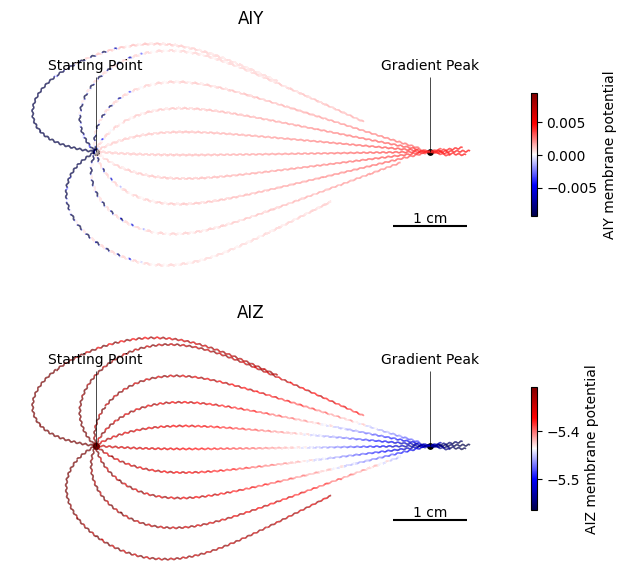

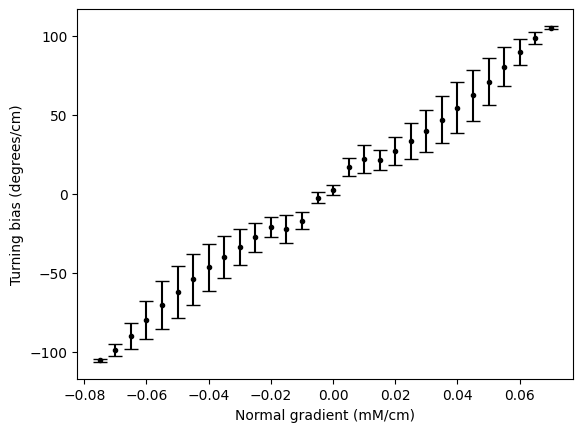

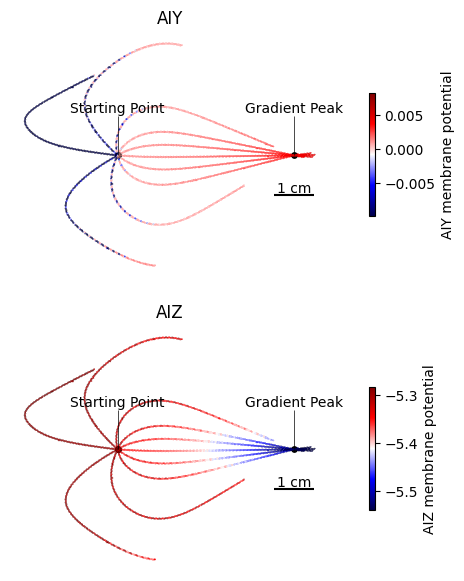

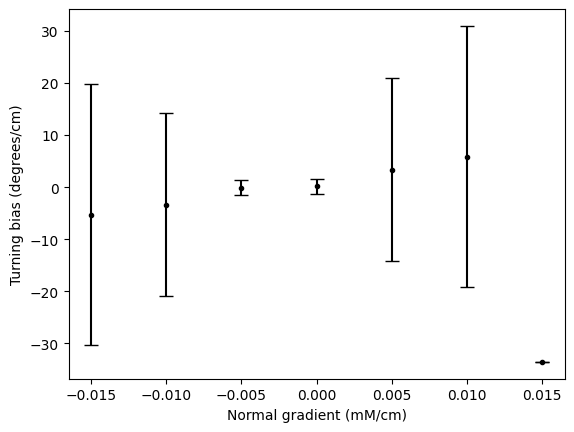

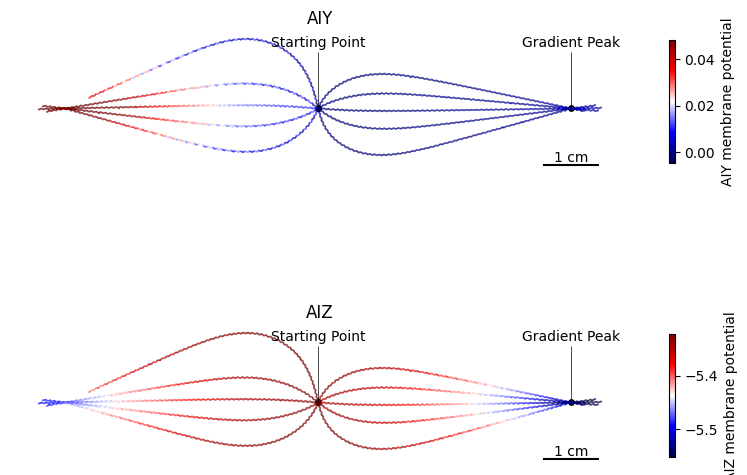

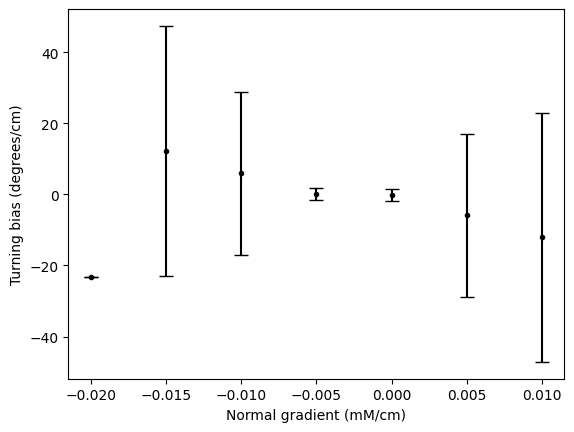

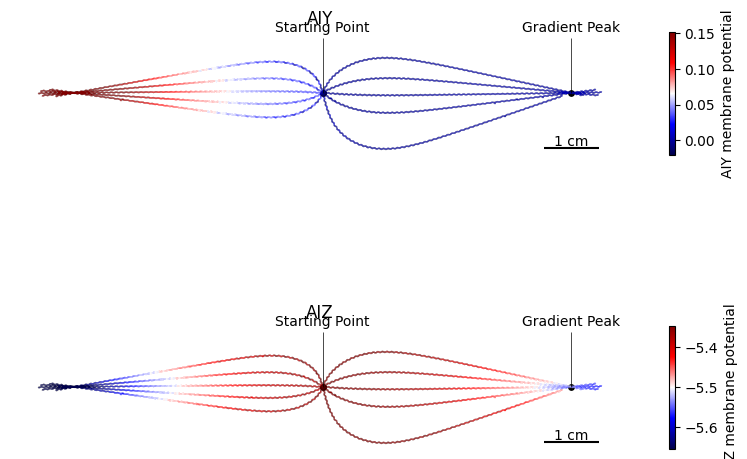

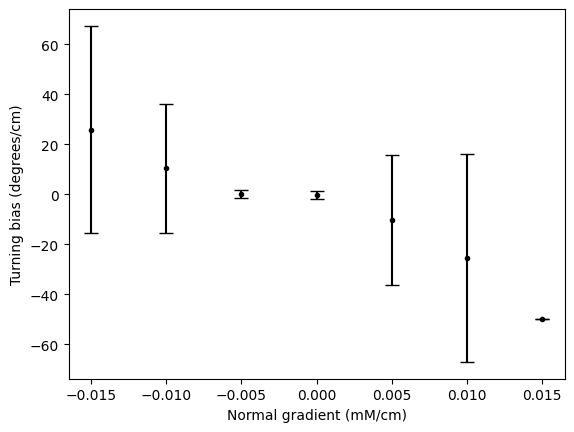

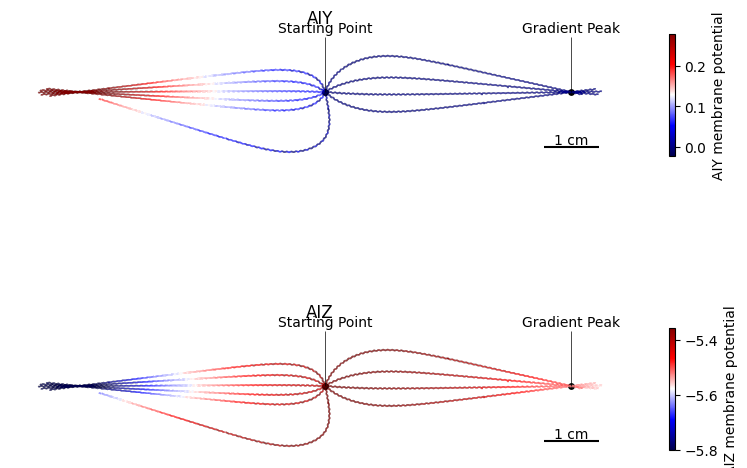

In [8]:
import load
import figure
import os

gene_number = 0

result = load.load_result_json(
    "../result/concentration_memory/Result_aiz_negative_{}.json".format(gene_number)
)

connectome_folder_path = "../figure/concentration_memory/two_gauss_concentration/Result_aiz_negative_{}/connectome".format(
    gene_number
)
os.makedirs(connectome_folder_path, exist_ok=True)
connectome_file_path_base = connectome_folder_path + "/connectome_"

N_T_in_file_path_base = "../output/concentration_memory/two_gauss_concentration/Result_aiz_negative_{}/n_vs_t_".format(
    gene_number
)
N_T_out_folder_path = "../figure/concentration_memory/two_gauss_concentration/Result_aiz_negative_{}/nomal_gradient_vs_turning_bias".format(
    gene_number
)
os.makedirs(N_T_out_folder_path, exist_ok=True)
N_T_out_file_path_base = N_T_out_folder_path + "/n_vs_t_"

membrane_potential_folder_path = "../figure/concentration_memory/two_gauss_concentration/Result_aiz_negative_{}/trajectory_membrane_potential".format(
    gene_number
)
os.makedirs(membrane_potential_folder_path, exist_ok=True)
membrane_potential_file_path_base = (
    membrane_potential_folder_path + "/trajectory_membrane_potential_"
)

newron_folder_path = "../figure/concentration_memory/two_gauss_concentration/Result_aiz_negative_{}/newron".format(
    gene_number
)
os.makedirs(newron_folder_path, exist_ok=True)
newron_file_path_base = newron_folder_path + "/newron_"

for i in range(11):
    gene = result[i]["gene"]
    # file_path = "{}{}".format(connectome_file_path_base, i)
    # figure.connectome(gene, file_path)
    in_file_path = "{}{}.txt".format(N_T_in_file_path_base, i)
    out_file_path = "{}{}".format(N_T_out_file_path_base, i)
    figure.Normal_gradient_vs_Turing_bias(in_file_path, out_file_path)
    file_path = "{}{}".format(membrane_potential_file_path_base, i)
    figure.trajectory_membrane_potential(gene, 2, 10, file_path)
    # file_path = "{}{}".format(newron_file_path_base, i)
    # figure.newron_output(gene, file_path)

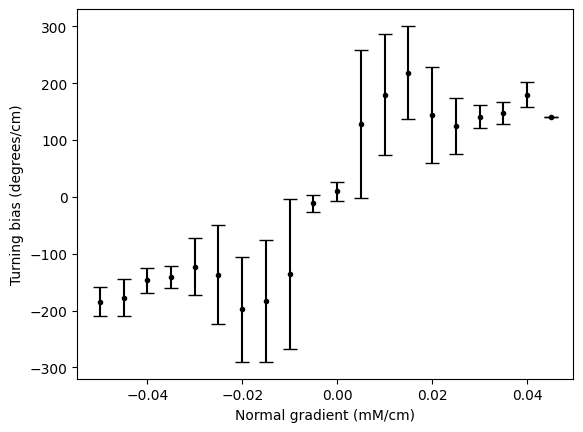

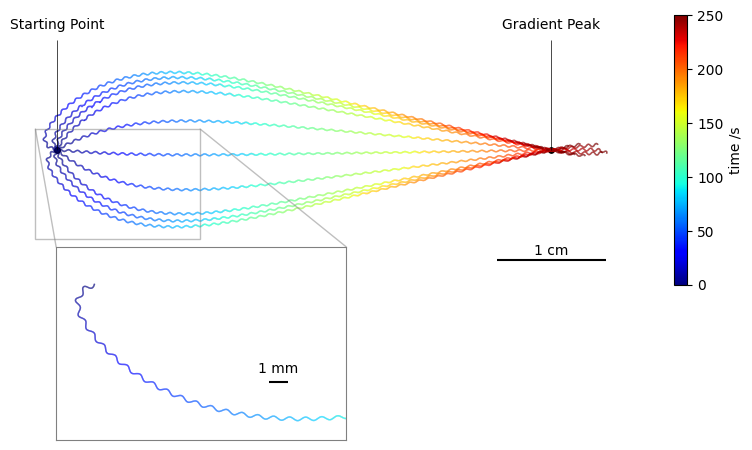

In [7]:
import figure
import load

figure.Normal_gradient_vs_Turing_bias("./n_vs_t_0.txt", "./n_vs_t_0")
# c_mode=0: liner, c_mode=1: gauss, c_mode=2: two_gauss
figure.trajectory(
    load.load_result_json("../result/Result_aiz_negative.json")[0]["gene"],
    2,
    10,
    7,
    "./trajectory_membrane_potential_0",
)